In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from BlockingPairs import blockingPairs
import json
import csv
from collections import defaultdict

In [3]:
results_dir = '../evaluating_responses/part_2b/'

In [3]:
gemini = pd.read_csv(results_dir+'gemini20_corrected.csv')
gemini.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.         62    62         62           62   
            10   Processed smoothly.        100   100        100          100   
            20   Processed smoothly.        100   100        100          100   
            50   EMPTY/NO MATCHING!           1     1          1            1   
                 INVALID MATCHING!           42    42         42           42   
                 Processed smoothly.         57    57         57           57   
womanmaster 5    Processed smoothly.         20    20         20           20   
            10   Processed smoothly.        100   100        100          100   
            20   INVALID MATCHING!            2     2          2            2   
                 Processed smoothly.         98    98         98           98   
            50   INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           20    20         20           20   
                 Processed smoothly.         79    79         79           79   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    62   
            10   Processed smoothly.                   100   
            20   Processed smoothly.                   100   
            50   EMPTY/NO MATCHING!                      1   
                 INVALID MATCHING!                      42   
                 Processed smoothly.                    57   
womanmaster 5    Processed smoothly.                    20   
            10   Processed smoothly.                   100   
            20   INVALID MATCHING!                       2   
                 Processed smoothly.                    98   
            50   INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      20   
                 Processed smoothly.                    79   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   62                  62   
            10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   EMPTY/NO MATCHING!                     1                   1   
                 INVALID MATCHING!                      0                  42   
                 Processed smoothly.                   57                  57   
womanmaster 5    Processed smoothly.                   20                  20   
            10   Processed smoothly.                  100                 100   
            20   INVALID MATCHING!                      0                   2   
                 Processed smoothly.                   98                  98   
            50   INCOMPLETE MATCHING!                   0                   1   
                 INVALID MATCHING!                      0                  20   
                 Processed smoothly.                   79                  79   

                                       Intersection  
Culture     Size Remarks                             
ic          5    Processed smoothly.             62  
            10   Processed smoothly.            100  
            20   Processed smoothly.            100  
            50   EMPTY/NO MATCHING!               1  
                 INVALID MATCHING!               42  
                 Processed smoothly.             57  
womanmaster 5    Processed smoothly.             20  
            10   Processed smoothly.            100  
            20   INVALID MATCHING!                2  
                 Processed smoothly.             98  
            50   INCOMPLETE 

In [4]:
gemini[gemini['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size Type                                                    
ic          5    random    15.000000     0.225806             2.161290   
                 random_1  15.000000     0.290323             1.645161   
            10   random    24.500000     0.020000             7.600000   
                 random_1  24.500000     0.020000             8.360000   
            20   random    24.500000     0.000000            30.900000   
                 random_1  24.500000     0.000000            25.020000   
            50   random    26.333333     0.000000           304.148148   
                 random_1  24.966667     0.000000            83.866667   
womanmaster 5    random     4.500000     0.400000             2.200000   
                 random_1   4.500000     0.400000             1.400000   
            10   random    24.500000     0.020000            10.420000   
                 random_1  24.500000     0.040000             8.800000   
            20   random    24.204082     0.000000            43.918367   
                 random_1  24.897959     0.000000            44.265306   
            50   random    25.425000     0.000000           303.775000   
                 random_1  22.666667     0.000000           186.948718   

                           Jaccard_Similarity  Intersection  
Culture     Size Type                                        
ic          5    random              0.354839      2.290323  
                 random_1            0.309780      1.967742  
            10   random              0.229475      3.480000  
                 random_1            0.216775      3.220000  
            20   random              0.121312      4.160000  
                 random_1            0.226530      6.860000  
            50   random              0.087656      7.703704  
                 random_1            0.438295     27.333333  
womanmaster 5    random              0.492857      2.700000  
                 random_1            0.544048      3.100000  
            10   random              0.227957      3.380000  
                 random_1            0.291835      4.020000  
            20   random              0.158902      5.102041  
                 random_1            0.245370      6.959184  
            50   random              0.117724     10.025000  
                 random_1            0.338998     21.564103

In [9]:
gemini25 = pd.read_csv(results_dir+'gemini25_corrected.csv')
gemini25.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                       
ic          10   Processed smoothly.       100   100        100          100   
            20   Processed smoothly.       100   100        100          100   
            50   Processed smoothly.       100   100        100          100   
womanmaster 10   Processed smoothly.       100   100        100          100   
            20   Processed smoothly.       100   100        100          100   
            50   Processed smoothly.       100   100        100          100   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   Processed smoothly.                  100                 100   
womanmaster 10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   Processed smoothly.                  100                 100   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          10   Processed smoothly.                 100           100  
            20   Processed smoothly.                 100           100  
            50   Processed smoothly.                 100           100  
womanmaster 10   Processed smoothly.                 100           100  
            20   Processed smoothly.                 100           100  
            50   Processed smoothly.                 100           100

In [10]:
gemini25[gemini25['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size Type                                                   
ic          10   random       24.50         0.92                 0.20   
                 random_1     24.50         0.96                 0.06   
            20   random       24.50         0.60                 1.88   
                 random_1     24.50         0.74                 0.78   
            50   random       25.48         0.02                58.74   
                 random_1     24.50         0.02                37.74   
womanmaster 10   random       24.50         0.98                 0.02   
                 random_1     24.50         1.00                 0.00   
            20   random       24.50         0.82                 0.34   
                 random_1     24.50         0.80                 0.34   
            50   random       24.50         0.34                18.82   
                 random_1     24.50         0.16                12.88   

                           Jaccard_Similarity  Intersection  
Culture     Size Type                                        
ic          10   random              0.950110          9.66  
                 random_1            0.975769          9.82  
            20   random              0.776012         16.74  
                 random_1            0.870025         18.22  
            50   random              0.303079         21.42  
                 random_1            0.321283         23.08  
womanmaster 10   random              0.993333          9.96  
                 random_1            1.000000         10.00  
            20   random              0.932515         19.10  
                 random_1            0.944542         19.34  
            50   random              0.735437         40.76  
                 random_1            0.701867         40.32

In [16]:
sum(gemini25[gemini25['Type'] == 'random']['Correctness'].values)

0

In [12]:
gemini25_p1 = pd.read_csv(results_dir.replace('2b', '1')+'gemini25_corrected.csv')
gemini25_p1[gemini25_p1['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                               
ic          10        24.5         0.98                 0.02   
            20        24.5         0.78                 0.40   
            50        24.5         0.08                39.88   
womanmaster 10        24.5         0.98                 0.02   
            20        24.5         0.88                 0.16   
            50        24.5         0.40                12.16   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          10              0.990769          9.94  
            20              0.889822         18.56  
            50              0.357733         24.46  
womanmaster 10              0.993333          9.96  
            20              0.961681         19.54  
            50              0.824293         44.28

In [17]:
sum(gemini25_p1['Correctness'].values)

205

In [20]:
dsd = pd.read_csv(results_dir+'deepseek_dist_corrected.csv')
dsd.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.         62    62         62           62   
            10   INCOMPLETE MATCHING!         1     1          1            1   
                 Processed smoothly.         99    99         99           99   
            20   EMPTY/NO MATCHING!           1     1          1            1   
                 INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           11    11         11           11   
                 Processed smoothly.         87    87         87           87   
            50   EMPTY/NO MATCHING!           5     5          5            5   
                 INVALID MATCHING!           78    78         78           78   
                 Processed smoothly.         17    17         17           17   
womanmaster 5    Processed smoothly.         20    20         20           20   
            10   Processed smoothly.        100   100        100          100   
            20   INCOMPLETE MATCHING!         1     1          1            1   
                 Processed smoothly.         99    99         99           99   
            50   EMPTY/NO MATCHING!           3     3          3            3   
                 INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           56    56         56           56   
                 Processed smoothly.         40    40         40           40   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    62   
            10   INCOMPLETE MATCHING!                    1   
                 Processed smoothly.                    99   
            20   EMPTY/NO MATCHING!                      1   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      11   
                 Processed smoothly.                    87   
            50   EMPTY/NO MATCHING!                      5   
                 INVALID MATCHING!                      78   
                 Processed smoothly.                    17   
womanmaster 5    Processed smoothly.                    20   
            10   Processed smoothly.                   100   
            20   INCOMPLETE MATCHING!                    1   
                 Processed smoothly.                    99   
            50   EMPTY/NO MATCHING!                      3   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      56   
                 Processed smoothly.                    40   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   62                  62   
            10   INCOMPLETE MATCHING!                   1                   1   
                 Processed smoothly.                   99                  99   
            20   EMPTY/NO MATCHING!                     1                   1   
                 INCOMPLETE MATCHING!                   1                   1   
                 INVALID MATCHING!                      4                  11   
                 Processed smoothly.                   87                  87   
            50   EMPTY/NO MATCHING!                     5                   5   
                 INVALID MATCHING!                      6                  78   
                 Processed smoothly.                   17                  17   
womanmaster 5    Processed smoothly.                   20                  20   
            10   Processed smoothly.                  100                 100   
            20   INCOMPLETE MATCHING!      

In [21]:
dsd[dsd['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size Type                                                    
ic          5    random    15.000000     0.935484             0.064516   
                 random_1  15.000000     0.870968             0.193548   
            10   random    24.500000     0.540000             1.420000   
                 random_1  24.265306     0.469388             1.714286   
            20   random    24.744186     0.000000            36.720930   
                 random_1  24.840909     0.113636            15.181818   
            50   random    30.285714     0.000000           495.142857   
                 random_1  24.000000     0.000000           179.300000   
womanmaster 5    random     4.500000     1.000000             0.000000   
                 random_1   4.500000     1.000000             0.000000   
            10   random    24.500000     0.620000             1.460000   
                 random_1  24.500000     0.680000             0.900000   
            20   random    24.500000     0.060000            20.300000   
                 random_1  24.591837     0.204082             8.795918   
            50   random    23.300000     0.000000           448.100000   
                 random_1  21.133333     0.000000           144.266667   

                           Jaccard_Similarity  Intersection  
Culture     Size Type                                        
ic          5    random              0.814772      4.258065  
                 random_1            0.778802      4.129032  
            10   random              0.717456      7.940000  
                 random_1            0.690882      7.795918  
            20   random              0.220463      6.604651  
                 random_1            0.518031     12.636364  
            50   random              0.028798      2.714286  
                 random_1            0.574000     31.000000  
womanmaster 5    random              1.000000      5.000000  
                 random_1            1.000000      5.000000  
            10   random              0.799750      8.540000  
                 random_1            0.846252      8.940000  
            20   random              0.422133     11.080000  
                 random_1            0.661888     15.204082  
            50   random              0.067435      6.100000  
                 random_1            0.652707     36.066667

In [5]:
llama = pd.read_csv(results_dir+'llama33_corrected.csv')
llama.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.         62    62         62           62   
            10   Processed smoothly.        100   100        100          100   
            20   Processed smoothly.        100   100        100          100   
            50   EMPTY/NO MATCHING!          11    11         11           11   
                 INVALID MATCHING!           19    19         19           19   
                 Processed smoothly.         70    70         70           70   
womanmaster 5    Processed smoothly.         20    20         20           20   
            10   Processed smoothly.        100   100        100          100   
            20   Processed smoothly.        100   100        100          100   
            50   EMPTY/NO MATCHING!           6     6          6            6   
                 INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           11    11         11           11   
                 Processed smoothly.         82    82         82           82   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    62   
            10   Processed smoothly.                   100   
            20   Processed smoothly.                   100   
            50   EMPTY/NO MATCHING!                     11   
                 INVALID MATCHING!                      19   
                 Processed smoothly.                    70   
womanmaster 5    Processed smoothly.                    20   
            10   Processed smoothly.                   100   
            20   Processed smoothly.                   100   
            50   EMPTY/NO MATCHING!                      6   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      11   
                 Processed smoothly.                    82   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   62                  62   
            10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   EMPTY/NO MATCHING!                    11                  11   
                 INVALID MATCHING!                      0                  19   
                 Processed smoothly.                   70                  70   
womanmaster 5    Processed smoothly.                   20                  20   
            10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   EMPTY/NO MATCHING!                     6                   6   
                 INCOMPLETE MATCHING!                   0                   1   
                 INVALID MATCHING!                      0                  11   
                 Processed smoothly.                   82                  82   

                                       Intersection  
Culture     Size Remarks                             
ic          5    Processed smoothly.             62  
            10   Processed smoothly.            100  
            20   Processed smoothly.            100  
            50   EMPTY/NO MATCHING!              11  
                 INVALID MATCHING!               19  
                 Processed smoothly.             70  
womanmaster 5    Processed smoothly.             20  
            10   Processed smoothly.            100  
            20   Processed smoothly.            100  
            50   EMPTY/NO MATCHING!               6  
                 INCOMPLETE 

In [6]:
llama[llama['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size Type                                                    
ic          5    random    15.000000     0.451613             1.290323   
                 random_1  15.000000     0.290323             1.580645   
            10   random    24.500000     0.000000             7.980000   
                 random_1  24.500000     0.020000             6.020000   
            20   random    24.500000     0.000000            44.720000   
                 random_1  24.500000     0.000000            29.780000   
            50   random    21.361111     0.000000           511.916667   
                 random_1  23.676471     0.000000           228.029412   
womanmaster 5    random     4.500000     0.200000             1.300000   
                 random_1   4.500000     0.300000             2.200000   
            10   random    24.500000     0.000000             8.280000   
                 random_1  24.500000     0.000000             6.380000   
            20   random    24.500000     0.000000            47.700000   
                 random_1  24.500000     0.000000            43.500000   
            50   random    23.694444     0.000000           486.444444   
                 random_1  24.652174     0.000000           285.413043   

                           Jaccard_Similarity  Intersection  
Culture     Size Type                                        
ic          5    random              0.553123      3.225806  
                 random_1            0.485407      2.967742  
            10   random              0.271586      4.040000  
                 random_1            0.350196      4.860000  
            20   random              0.107896      3.720000  
                 random_1            0.226738      7.060000  
            50   random              0.028328      2.666667  
                 random_1            0.420336     26.058824  
womanmaster 5    random              0.457540      2.900000  
                 random_1            0.446825      2.600000  
            10   random              0.274300      4.080000  
                 random_1            0.367191      5.040000  
            20   random              0.158114      5.220000  
                 random_1            0.253500      7.540000  
            50   random              0.059786      5.444444  
                 random_1            0.413424     25.217391

In [32]:
qwen = pd.read_csv(results_dir+'qwen_qwq_corrected.csv')
qwen.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.         49    49         49           49   
            10   EMPTY/NO MATCHING!           3     3          3            3   
                 Processed smoothly.         97    97         97           97   
            20   EMPTY/NO MATCHING!          18    18         18           18   
                 INVALID MATCHING!           11    11         11           11   
                 Processed smoothly.         71    71         71           71   
            50   EMPTY/NO MATCHING!          53    53         53           53   
                 INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           17    17         17           17   
                 Processed smoothly.         29    29         29           29   
womanmaster 5    Processed smoothly.         18    18         18           18   
            10   Processed smoothly.        100   100        100          100   
            20   EMPTY/NO MATCHING!          11    11         11           11   
                 INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           12    12         12           12   
                 Processed smoothly.         77    77         77           77   
            50   EMPTY/NO MATCHING!          46    46         46           46   
                 INCOMPLETE MATCHING!         1     1          1            1   
                 INVALID MATCHING!           17    17         17           17   
                 Processed smoothly.         36    36         36           36   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    49   
            10   EMPTY/NO MATCHING!                      3   
                 Processed smoothly.                    97   
            20   EMPTY/NO MATCHING!                     18   
                 INVALID MATCHING!                      11   
                 Processed smoothly.                    71   
            50   EMPTY/NO MATCHING!                     53   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      17   
                 Processed smoothly.                    29   
womanmaster 5    Processed smoothly.                    18   
            10   Processed smoothly.                   100   
            20   EMPTY/NO MATCHING!                     11   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      12   
                 Processed smoothly.                    77   
            50   EMPTY/NO MATCHING!                     46   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      17   
                 Processed smoothly.                    36   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   49                  49   
            10   EMPTY/NO MATCHING!                     3                   3   
                 Processed smoothly.                   97                  97   
            20   EMPTY/NO MATCHING!                    18                  18   
                 INVALID MATCHING!                      2                  11   
                 Processed smoothly.                   71                  71   
            50   EMPTY/NO MATCHING!                    53                  53   
                 INCOMPLETE MATCHING!                   0                   1   
                 INVALID MATCHING!                      3                  17   


In [33]:
qwen[qwen['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.204082     0.653061             0.653061   
            10    24.144330     0.154639             4.876289   
            20    24.239437     0.014085            38.535211   
            50    25.896552     0.000000           198.965517   
womanmaster 5      4.611111     0.722222             0.444444   
            10    24.500000     0.170000             3.660000   
            20    25.012987     0.025974            36.142857   
            50    23.805556     0.000000           289.555556   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.750162      4.020408  
            10              0.463873      5.793814  
            20              0.349352      8.605634  
            50              0.607227     31.689655  
womanmaster 5               0.805996      4.222222  
            10              0.546744      6.680000  
            20              0.443814     10.571429  
            50              0.492867     25.888889

In [23]:
deepseek = pd.read_csv(results_dir+'deepseek_corrected.csv')
deepseek.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                       
ic          10   Processed smoothly.       100   100        100          100   
            20   Processed smoothly.       100   100        100          100   
            50   INVALID MATCHING!           2     2          2            2   
                 Processed smoothly.        98    98         98           98   
womanmaster 10   Processed smoothly.       100   100        100          100   
            20   Processed smoothly.       100   100        100          100   
            50   INVALID MATCHING!           1     1          1            1   
                 Processed smoothly.        99    99         99           99   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   INVALID MATCHING!                      2                   0   
                 Processed smoothly.                   98                  98   
womanmaster 10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   INVALID MATCHING!                      1                   0   
                 Processed smoothly.                   99                  99   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          10   Processed smoothly.                 100           100  
            20   Processed smoothly.                 100           100  
            50   INVALID MATCHING!                     2             2  
                 Processed smoothly.                  98            98  
womanmaster 10   Processed smoothly.                 100           100  
            20   Processed smoothly.                 100           100  
            50   INVALID MATCHING!                     1             1  
                 Processed smoothly.                  99            99

In [24]:
deepseek[deepseek['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size Type                                                    
ic          10   random    24.500000     0.980000             0.020000   
                 random_1  24.500000     0.960000             0.040000   
            20   random    24.500000     0.320000            12.980000   
                 random_1  24.500000     0.280000             8.160000   
            50   random    23.937500     0.000000           365.979167   
                 random_1  24.500000     0.000000            42.720000   
womanmaster 10   random    24.500000     0.980000             0.020000   
                 random_1  24.500000     1.000000             0.000000   
            20   random    24.500000     0.760000             0.520000   
                 random_1  24.500000     0.880000             0.340000   
            50   random    24.142857     0.244898            39.877551   
                 random_1  24.500000     0.280000             5.820000   

                           Jaccard_Similarity  Intersection  
Culture     Size Type                                        
ic          10   random              0.970769      9.800000  
                 random_1            0.964103      9.740000  
            20   random              0.558048     13.040000  
                 random_1            0.578951     13.640000  
            50   random              0.065127      5.916667  
                 random_1            0.719738     40.300000  
womanmaster 10   random              0.993333      9.960000  
                 random_1            1.000000     10.000000  
            20   random              0.932881     19.200000  
                 random_1            0.966836     19.600000  
            50   random              0.774852     42.530612  
                 random_1            0.909294     47.520000

In [25]:
o3mini = pd.read_csv(results_dir+'o3-mini_corrected.csv')
o3mini.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Type  Corrected  Correctness  \
Culture     Size Remarks                                                       
ic          5    Processed smoothly.        62    62         62           62   
            10   Processed smoothly.       100   100        100          100   
            20   Processed smoothly.       100   100        100          100   
            50   Processed smoothly.       100   100        100          100   
womanmaster 5    Processed smoothly.        20    20         20           20   
            10   Processed smoothly.       100   100        100          100   
            20   Processed smoothly.       100   100        100          100   
            50   Processed smoothly.       100   100        100          100   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   62                  62   
            10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   Processed smoothly.                  100                 100   
womanmaster 5    Processed smoothly.                   20                  20   
            10   Processed smoothly.                  100                 100   
            20   Processed smoothly.                  100                 100   
            50   Processed smoothly.                  100                 100   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          5    Processed smoothly.                  62            62  
            10   Processed smoothly.                 100           100  
            20   Processed smoothly.                 100           100  
            50   Processed smoothly.                 100           100  
womanmaster 5    Processed smoothly.                  20            20  
            10   Processed smoothly.                 100           100  
            20   Processed smoothly.                 100           100  
            50   Processed smoothly.                 100           100

In [26]:
o3mini[o3mini['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size', 'Type']).mean(['Blocking_Pair_Count'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size Type                                                   
ic          5    random        15.0         1.00                 0.00   
                 random_1      15.0         1.00                 0.00   
            10   random        24.5         1.00                 0.00   
                 random_1      24.5         1.00                 0.00   
            20   random        24.5         0.64                 1.98   
                 random_1      24.5         0.64                 2.40   
            50   random        24.5         0.00               239.66   
                 random_1      24.5         0.00               128.14   
womanmaster 5    random         4.5         1.00                 0.00   
                 random_1       4.5         1.00                 0.00   
            10   random        24.5         1.00                 0.00   
                 random_1      24.5         0.96                 0.06   
            20   random        24.5         0.78                 0.38   
                 random_1      24.5         0.82                 0.38   
            50   random        24.5         0.00               181.56   
                 random_1      24.5         0.06                69.22   

                           Jaccard_Similarity  Intersection  
Culture     Size Type                                        
ic          5    random              1.000000          5.00  
                 random_1            1.000000          5.00  
            10   random              1.000000         10.00  
                 random_1            1.000000         10.00  
            20   random              0.811437         17.34  
                 random_1            0.829919         17.62  
            50   random              0.096828          8.60  
                 random_1            0.320106         22.60  
womanmaster 5    random              1.000000          5.00  
                 random_1            1.000000          5.00  
            10   random              1.000000         10.00  
                 random_1            0.986667          9.92  
            20   random              0.933969         19.20  
                 random_1            0.951707         19.42  
            50   random              0.390499         26.06  
                 random_1            0.617966         37.18

In [10]:
from scipy import stats
import itertools

def JSONMatchToList(json_match_string):
    json_match_string = json_match_string.replace(" ", "")
    if json_match_string.endswith("],]"):
        pairs = json_match_string[1:-2].split('],[')
    else:
        pairs = json_match_string[1:-1].split('],[')
    
    # print("IN JSON TO STR FUNC")
    # print(pairs)

    # Step 2: Extract the W number from each pair and convert to integer
    result = []
    for pair in pairs:
        # Split the pair and take the second element (Wj), then extract the number
        w_value_str = (pair.split(',')[1][1:])
        if w_value_str[-1] == "]":
            if w_value_str[-2] == "]":
                w_value = int(w_value_str[:-2])
            else:
                w_value = int(w_value_str[:-1])
        else:
            w_value = int(w_value_str)
        result.append(w_value)

    # Step 3: Print the resulting list
    return result
    # print(result)  # Output: [7, 2, 9, 5, 4, 1, 6, 8, 10, 3]

def JSONobjToList(json_obj, n):
    if not json_obj:
        print("EMPTY JSON OBJ")
        return [], 'empty'
    matching = []
    for m in range(1, n+1):
        mstring = f"M{m}"
        if mstring not in json_obj or not json_obj[mstring] or json_obj[mstring].lower().strip() == 'none':
            matching.append(0)
        else:
            try:
                woman = int(json_obj[mstring][1:])
                matching.append(woman)
            except:
                print(f"WRONG VALUE FORMAT: {json_obj[mstring]}")
                return matching, f"For example, {mstring}'s match is given the incorrect format - {json_obj[mstring]}. "
    return matching, "okay"

models = ['gemini20', 'gemini25', 'llama33', 'qwen_qwq', 'o3-mini', 'deepseek_dist', 'deepseek']

# data_bps = [['Model', 'Culure', 'Size', 'Type', 'Fraction']]
# data_acc = [['Model', 'Culure', 'Size', 'Type', 'Fraction']]

data_bps = [['Model', 'Size', 'Type', 'Fraction']]
data_acc = [['Model', 'Size', 'Type', 'Fraction']]



for size in [10, 20, 50]:
    size_bp_ones = defaultdict(list)
    size_bp_rand = defaultdict(list)
    size_bp_neither = defaultdict(list)
    print(f"SIZE: {size} $$$$$$$$$$$$$$$$$$$$$$$$$$")
    for culture in ['ic', 'womanmaster']:
        print(f"CULTURE: {culture} ----------------------")
        for model in models:
            print(model)
            df1 = pd.read_csv(f'../evaluating_responses/part_1/{model}_corrected.csv')
            df2 = pd.read_csv(f'../evaluating_responses/part_2b/{model}_corrected.csv')

            acc1 = round(len(df1[(df1['Size'] == size) & (df1['Culture'] == culture) & (df1['Remarks'] == 'Processed smoothly.') 
                      & (df1['Correctness'] == 1)])*100/50, 2)
            acc2one = round(len(df2[(df2['Size'] == size) & (df2['Culture'] == culture) & (df2['Remarks'] == 'Processed smoothly.') & (df2['Correctness'] == 1) & (df2['Type'] == 'random_1')])*100/50, 2)
            acc2ran = round(len(df2[(df2['Size'] == size) & (df2['Culture'] == culture) & (df2['Remarks'] == 'Processed smoothly.') & (df2['Correctness'] == 1) & (df2['Type'] == 'random')])*100/50, 2)

            bp1 = df1[(df1['Size'] == size) & (df1['Culture'] == culture) & (df1['Remarks'] == 'Processed smoothly.') 
                    #   & (df1['Correctness'] == 0)
                      ]['Blocking_Pair_Count'].values
            one_bp = df2[(df2['Size'] == size) & (df2['Culture'] == culture) & (df2['Remarks'] == 'Processed smoothly.') 
                        #  & (df2['Correctness'] == 0) 
                         & (df2['Type'] == 'random_1')]
            bp2one = one_bp['Blocking_Pair_Count'].values
            ones = [1]*len(bp2one)
            rand = df2[(df2['Size'] == size) & (df2['Culture'] == culture) & (df2['Remarks'] == 'Processed smoothly.') 
                    #    & (df2['Correctness'] == 0) 
                       & (df2['Type'] == 'random')]
            bp2ran = rand['Blocking_Pair_Count'].values
            rand_failed = rand['Instance'].values
            r1_failed = one_bp['Instance'].values
            rand_bps = []
            num_r1_same = 0
            num_rand_same = 0
            total_bps = []
            matchings = pd.read_csv(f'../instances_matchings/{size}_{culture}_processed.csv')
            for i, row in enumerate(matchings.values[:50]):
                # if not i and culture == 'womanmaster' and size == 20:
                rand_matching = JSONMatchToList(row[12])
                bp = blockingPairs(size, row[4], row[5], np.array(rand_matching), "weak")
                bp_count = bp["blockingPairCount"]
                total_bps.append(bp_count)
                if i in rand_failed: 
                    rand_bps.append(bp_count)
                    rand_ans = rand[rand['Instance'] == i]['Corrected'].values[0]
                    rand_ans = json.loads(rand_ans.replace('\'', '\"'))
                    rand_ans, verdict = JSONobjToList(rand_ans, size)
                    if rand_ans == rand_matching:
                        num_rand_same += 1
                if i in r1_failed:
                    one_ans = one_bp[one_bp['Instance'] == i]['Corrected'].values[0]
                    one_ans = json.loads(one_ans.replace('\'', '\"'))
                    one_ans, verdict = JSONobjToList(one_ans, size)
                    true_one = JSONMatchToList(row[9])
                    if one_ans == true_one:
                        num_r1_same += 1
                    # print(i, one_ans, true_one)
                # else:
                #     print(i)
                
                        
            # data_bps.append([model, culture, size, 'one_bp', round(sum(bp2one)/len(bp2one), 2)])
            # data_bps.append([model, culture, size, 'random', round(sum(bp2ran)/len(bp2ran), 2)])
            data_acc.append([model, culture, size, 'one_bp', acc2one])
            data_acc.append([model, culture, size, 'random', acc2ran])

            # print(num_r1_same, len(one_bp))
            # print(num_rand_same, len(rand))
            # print(round(sum(total_bps)/50, 2))

            # test = stats.ttest_ind(bp1, bp2one, equal_var=False)
            # if test.pvalue < 0.05: 
            #     print(f'Part-1: {round(sum(bp1)/len(bp1), 2)}')
            #     print(f'Part-2b (One): {round(sum(bp2one)/len(bp2one), 2)}')
            #     print(test)
            #     print()

            # test = stats.ttest_ind(ones, bp2one, equal_var=False)
            # if test.pvalue < 0.05: 
            #     print(f'Ones: {round(sum(ones)/len(ones), 2)}')
            #     print(f'Part-2b (One): {round(sum(bp2one)/len(bp2one), 2)}')
            #     print(test)
            #     print()

            # test = stats.ttest_ind(bp1, bp2ran, equal_var=False)
            # if test.pvalue < 0.05: 
            #     print(f'Part-1: {round(sum(bp1)/len(bp1), 2)}')
            #     print(f'Part-2b (Rand): {round(sum(bp2ran)/len(bp2ran), 2)}')
            #     print(test)
            #     print()

            # test = stats.ttest_ind(rand_bps, bp2ran, equal_var=False)
            # if test.pvalue < 0.05: 
            #     print(f'Rand: {round(sum(rand_bps)/len(rand_bps), 2)} (len: {len(rand_bps)})')
            #     print(f'Part-2b (Rand): {round(sum(bp2ran)/len(bp2ran), 2)} (len: {len(bp2ran)})')
            #     print(test)
            #     print()

            # test = stats.ttest_ind(bp2one, bp2ran, equal_var=False)
            # if test.pvalue < 0.05: 
            #     print(f'Part-2b (One): {round(sum(bp2one)/len(bp2one), 2)} (len: {len(bp2one)})')
            #     print(f'Part-2b (Rand): {round(sum(bp2ran)/len(bp2ran), 2)} (len: {len(bp2ran)})')
            #     print(test)
            #     print()

            # print()

            size_bp_ones[model].extend(bp2one)
            size_bp_rand[model].extend(bp2ran)
            size_bp_neither[model].extend(bp1)

    for model in models:
        print(f"MODEL: {model}")
        # test = stats.ttest_ind(size_bp_ones[model], size_bp_rand[model], equal_var=False)
        # if test.pvalue < 0.05: 
        #     print(f'Part-2b (One) {size}: {round(sum(size_bp_ones[model])/len(size_bp_ones[model]), 2)} (len: {len(size_bp_ones[model])})')
        #     print(f'Part-2b (Rand) {size}: {round(sum(size_bp_rand[model])/len(size_bp_rand[model]), 2)} (len: {len(size_bp_rand[model])})')
        #     print(test)
        #     print()

        test = stats.ttest_ind(size_bp_neither[model], size_bp_rand[model], equal_var=False)
        if test.pvalue < 0.05: 
            print(f'Part-1 {size}: {round(sum(size_bp_neither[model])/len(size_bp_neither[model]), 2)} (len: {len(size_bp_neither[model])})')
            print(f'Part-2b (Rand) {size}: {round(sum(size_bp_rand[model])/len(size_bp_rand[model]), 2)} (len: {len(size_bp_rand[model])})')
            print(test)
            print()
            
        # data_bps.append([model, size, 'one_bp', round(sum(size_bp_ones[model])/len(size_bp_ones[model]), 2)])
        # data_bps.append([model, size, 'random', round(sum(size_bp_rand[model])/len(size_bp_rand[model]), 2)])
            
# with open(results_dir + f"combined_bpcounts.csv", 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerows(data_bps)
with open(results_dir + f"combined_accs.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_acc)

SIZE: 10 $$$$$$$$$$$$$$$$$$$$$$$$$$
CULTURE: ic ----------------------
gemini20
gemini25
llama33
qwen_qwq
o3-mini
deepseek_dist
deepseek
CULTURE: womanmaster ----------------------
gemini20
gemini25
llama33
qwen_qwq
o3-mini
deepseek_dist
deepseek
MODEL: gemini20
Part-1 10: 5.93 (len: 99)
Part-2b (Rand) 10: 9.01 (len: 100)
TtestResult(statistic=-4.332554528742683, pvalue=2.426129592485627e-05, df=183.10122057604372)

MODEL: gemini25
MODEL: llama33
Part-1 10: 6.08 (len: 100)
Part-2b (Rand) 10: 8.13 (len: 100)
TtestResult(statistic=-2.996786308062712, pvalue=0.003123579828722524, df=175.6156157014247)

MODEL: qwen_qwq
Part-1 10: 2.87 (len: 97)
Part-2b (Rand) 10: 6.27 (len: 98)
TtestResult(statistic=-4.798899012163204, pvalue=3.867912158141971e-06, df=147.6430324897215)

MODEL: o3-mini
MODEL: deepseek_dist
Part-1 10: 0.65 (len: 100)
Part-2b (Rand) 10: 1.44 (len: 100)
TtestResult(statistic=-2.3793301261300104, pvalue=0.018586602457388978, df=151.82412757104845)

MODEL: deepseek
SIZE: 20 $$$

In [90]:
from scipy.stats import fisher_exact
import itertools

models = ['gemini20', 'gemini25', 'llama33', 'qwen_qwq', 'o3-mini', 'deepseek_dist', 'deepseek']

data = [['Model', 'Culure', 'Size', 'Type', 'Fraction']]

for size in [10, 20, 50]:
    print(f"SIZE: {size} $$$$$$$$$$$$$$$$$$$$$$$$$$")
    for culture in ['ic', 'womanmaster']:
        print(f"CULTURE: {culture} ----------------------")
        for model in models:
            print(model)
            df1 = pd.read_csv(f'../evaluating_responses/part_1/{model}_corrected.csv')
            df2 = pd.read_csv(f'../evaluating_responses/part_2b/{model}_corrected.csv')

            correct1 = len(df1[(df1['Size'] == size) & (df1['Culture'] == culture) & (df1['Correctness'] == 1)])
            correct2one = len(df2[(df2['Size'] == size) & (df2['Culture'] == culture) & (df2['Correctness'] == 1) & (df2['Type'] == 'random_1')])
            correct2ran = len(df2[(df2['Size'] == size) & (df2['Culture'] == culture) & (df2['Correctness'] == 1) & (df2['Type'] == 'random')])

            fdata = [
                [correct1, 50-correct1],
                [correct2one, 50-correct2one]
            ]
            stat, pval = fisher_exact(fdata)
            if pval < 0.05:
                print(f'Part-1: {round(correct1/50, 2)}')
                print(f'Part-2b (One): {round(correct2one/50, 2)}')
                print(pval)
                print()

            fdata = [
                [correct1, 50-correct1],
                [correct2ran, 50-correct2ran]
            ]
            stat, pval = fisher_exact(fdata)
            if pval < 0.05:
                print(f'Part-1: {round(correct1/50, 2)}')
                print(f'Part-2b (Rand): {round(correct2ran/50, 2)}')
                print(pval)
                print()

            fdata = [
                [correct2one, 50-correct2one],
                [correct2ran, 50-correct2ran]
            ]
            stat, pval = fisher_exact(fdata)
            if pval < 0.05:
                print(f'Part-2b (One): {round(correct2one/50, 2)}')
                print(f'Part-2b (Rand): {round(correct2ran/50, 2)}')
                print(pval)
                print()

            print()

SIZE: 10 $$$$$$$$$$$$$$$$$$$$$$$$$$
CULTURE: ic ----------------------
gemini20

gemini25

llama33

qwen_qwq
Part-1: 0.28
Part-2b (Rand): 0.1
0.03951798812710845


o3-mini

deepseek_dist
Part-1: 0.7
Part-2b (One): 0.46
0.02529354193329522


deepseek

CULTURE: womanmaster ----------------------
gemini20

gemini25

llama33

qwen_qwq
Part-1: 0.2
Part-2b (Rand): 0.04
0.027746259148170357

Part-2b (One): 0.3
Part-2b (Rand): 0.04
0.0009062366858015316


o3-mini

deepseek_dist

deepseek

SIZE: 20 $$$$$$$$$$$$$$$$$$$$$$$$$$
CULTURE: ic ----------------------
gemini20

gemini25

llama33

qwen_qwq

o3-mini

deepseek_dist

deepseek

CULTURE: womanmaster ----------------------
gemini20

gemini25

llama33

qwen_qwq

o3-mini

deepseek_dist

deepseek

SIZE: 50 $$$$$$$$$$$$$$$$$$$$$$$$$$
CULTURE: ic ----------------------
gemini20

gemini25

llama33

qwen_qwq

o3-mini

deepseek_dist

deepseek

CULTURE: womanmaster ----------------------
gemini20

gemini25
Part-1: 0.4
Part-2b (One): 0.16
0.013482186179

new_order = {'Stable': array([ 0,  3, 17, 65, 98, 99, 99]), 'Unstable': array([100,  97,  83,  35,   2,   1,   1]), 'Incomplete': array([0, 0, 0, 0, 0, 0, 0]), 'No matching': array([0, 0, 0, 0, 0, 0, 0]), 'Invalid': array([0, 0, 0, 0, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'DeepSeek-70B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable': array([  1,   2,  15,  50, 100,  97,  94]), 'Unstable': array([99, 98, 82, 49,  0,  3,  6]), 'Incomplete': array([0, 0, 0, 1, 0, 0, 0]), 'No matching': array([0, 0, 3, 0, 0, 0, 0]), 'Invalid': array([0, 0, 0, 0, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'DeepSeek-70B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable': array([ 0,  0,  2, 13, 80, 82, 81]), 'Unstable': array([100,  98,  75,  86,  20,  18,  19]), 'Incomplete': array([0, 0, 1, 1, 0, 0, 0]), 'No matching': array([ 0,  0, 11,  0,  0,  0,  0]), 'Invalid': array([ 0,  2, 12,  0,  0,  0,  0])}
index=['Llama-

/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_30204/890134348.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_30204/890134348.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_30204/890134348.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_30204/890134348.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of

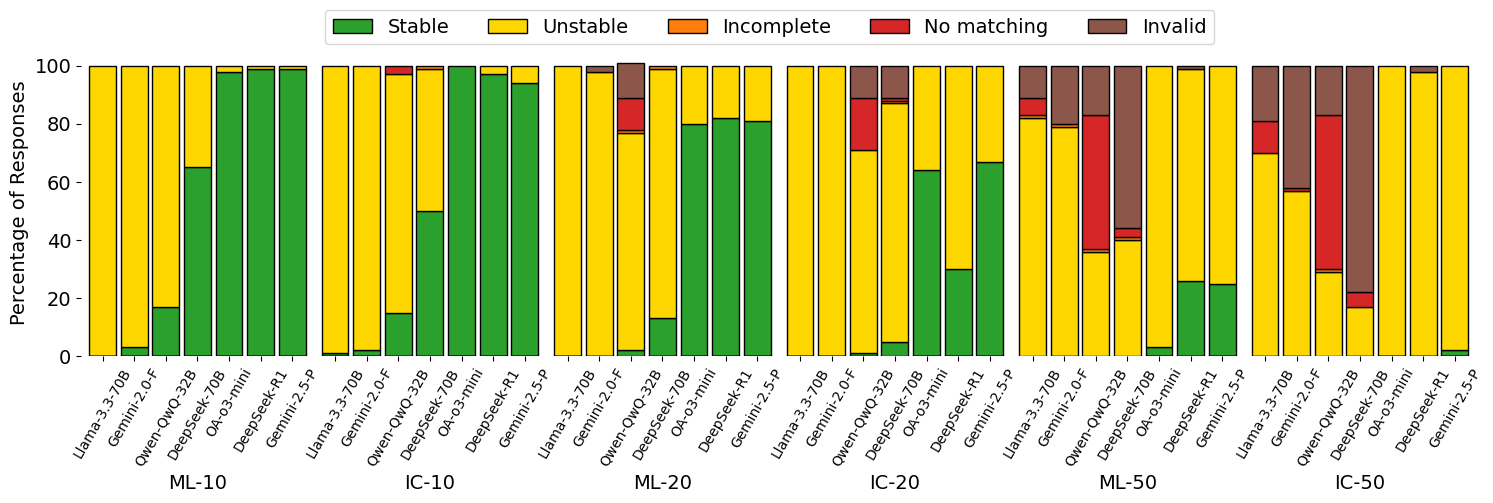

In [91]:
file_names = {
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

sizes = [10, 20, 50]
cultures = {
    'womanmaster': 'ML',
    'ic': 'IC', 
}

no = []
treatments = []
index = [model for model in file_names]

for size in sizes:
    for culture in cultures:
        treatments.append(f'{cultures[culture]}-{size}')
        invalids, stables, unstables, incompletes, emptys = [], [], [], [], []
        for model in file_names:
            data = pd.read_csv(results_dir+file_names[model])
            invalids.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'INVALID MATCHING!')]))
            incompletes.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'INCOMPLETE MATCHING!')]))
            emptys.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'EMPTY/NO MATCHING!')]))
            stables.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Blocking_Pair_Count'] == 0) & (data['Remarks'] == 'Processed smoothly.')]))
            unstables.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Blocking_Pair_Count'] != 0) & (data['Remarks'] == 'Processed smoothly.')]))
        weight_counts = {
            "Stable": np.array(stables),
            "Unstable": np.array(unstables),
            "Incomplete": np.array(incompletes),
            "No matching": np.array(emptys),
            "Invalid": np.array(invalids),
        }
        no.append(weight_counts)

def plot_stacked_graph(
            # self, 
            questions=[1,2,3,4,5,6], 
            title = 'Resolving_Instability', 
            figsize=(18,4), 
            labels_fontsize=14,
            ticks_fontsize=14,
            legend_fontsize=14,
            legend_pos=(0.76, 1.0),
        ):
        f, axs = plt.subplots(nrows=1, ncols=len(questions), sharey=True, figsize=figsize)
        plt.subplots_adjust(wspace=0)
        plt.tick_params(left = False)

        for j, question in enumerate(questions):
            # self.get_comparison(question, option, humans=humans)
            # ques_index = [self.index[ind] for ind in question_ordering[question]]
            ques_index = index
            new_order = {}
            # for key in self.metrics[f'q{question}']['order']:
                # new_order[key] = [self.metrics[f'q{question}']['order'][key][ind] for ind in question_ordering[question]]
            new_order = no[j]
            print(f"new_order = {new_order}\nindex={ques_index}")
            df = pd.DataFrame(data=new_order, index=ques_index)
            ax = df.plot(
                kind="bar", 
                ax=axs[j], 
                stacked=True, 
                rot=60, 
                width=0.85, 
                legend=False, 
                # color=['limegreen', 'palegreen', 'yellow', 'gold', 'orange', 'orangered'],
                color = ["tab:green", "gold", "tab:orange", "tab:red", "tab:brown"],
                edgecolor='black'
            ) 

            bars = ax.patches
            hatches = ''.join(h*len(df) for h in '\./')

            # for bar, hatch in zip(bars, hatches):
            #     bar.set_hatch(hatch)

            ax.set_xlabel(fr'{treatments[j]}', fontsize=labels_fontsize)
            ax.set_ylabel('Percentage of Responses', fontsize=labels_fontsize)
            ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)

            if j != 0:
                ax.spines['left'].set_visible(False)
                ax.tick_params(left=False)

            ax.spines['left'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

            handles, labels = ax.get_legend_handles_labels()
                

        f.legend(handles, labels, bbox_to_anchor=legend_pos, fontsize=legend_fontsize, ncol = 5)

        f.savefig(results_dir+f"{title}.pdf", bbox_inches="tight")

plot_stacked_graph()

In [40]:
df2['Type'] == 'random'

0      False
1       True
2      False
3       True
4      False
       ...  
595     True
596    False
597     True
598    False
599     True
Name: Type, Length: 600, dtype: bool

In [7]:
# Welch’s t-test
from scipy import stats
import itertools

bp_dfs = {}

file_names = {
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

for size in [10, 20, 50]:
    models = []
    types = []
    intersections = []
    for model in file_names:
        subset = pd.read_csv(results_dir+file_names[model])
        one_inter = subset[(subset['Size'] == size) & (subset['Type'] == 'random_1') & (subset['Remarks'] == 'Processed smoothly.')]['Intersection'].values
        models.extend([model]*len(one_inter))   
        types.extend(['One-BP']*len(one_inter))
        intersections.extend(one_inter)
        subseto = pd.read_csv('../evaluating_responses/part_1/'+file_names[model])
        none = subseto[(subseto['Size'] == size)& (subseto['Remarks'] == 'Processed smoothly.')]['Intersection'].values
        if model == 'DeepSeek-R1':
            print(none)
        models.extend([model]*len(none))   
        types.extend(['Neither']*len(none))
        intersections.extend(none)
        ran_inter = subset[(subset['Size'] == size) & (subset['Type'] == 'random')& (subset['Remarks'] == 'Processed smoothly.')]['Intersection'].values
        models.extend([model]*len(ran_inter))   
        types.extend(['Random']*len(ran_inter))
        intersections.extend(ran_inter)
    df = pd.DataFrame(zip(models, types, intersections), columns=['Model', 'Type', 'Intersection'])
    df.to_csv(results_dir+f'intersection_combined_{size}.csv', index=False)         
    

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10  7 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10]
[20 20 20 20 20 20 20 20 20 20 20 20 20 18 20 20 20 20 20 20 20 20 20 20
 17 20 20 20 20 20 20 17 20 20 20 20 20 17 20 16 20 20 17 20 20 20 17 20
 20 20 20 10 20 14 15 15 20 20 16 20 14 20 20 20 18 15 20 20 20 20 11 14
 20 18 16  9 12 20 16 20 20 10  5  8 12 20 16 20  9 15  7 14 13 10 11 20
  9 16 18 20]
[18  5  8  7  7  5 15  5  8 10  9 11 10 12 10 13 15  7 17  6 14 10 10 15
  6 14 14 11  7  6 16  6 13  2 18  9 14  7  8  7 13 45 50 50 50 50 50 45
 50 46 35 50 50 46 43 50 50 50 50 50 50 50 50 50 44 41 41 50 50 42 47 50
 50 44 39 40 44 40 44 50 46 50 50 50 50 45 45 45 50 47 39]


['One-BP' 'Neither' 'Random']
['One-BP' 'Neither' 'Random']
['One-BP' 'Neither' 'Random']


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

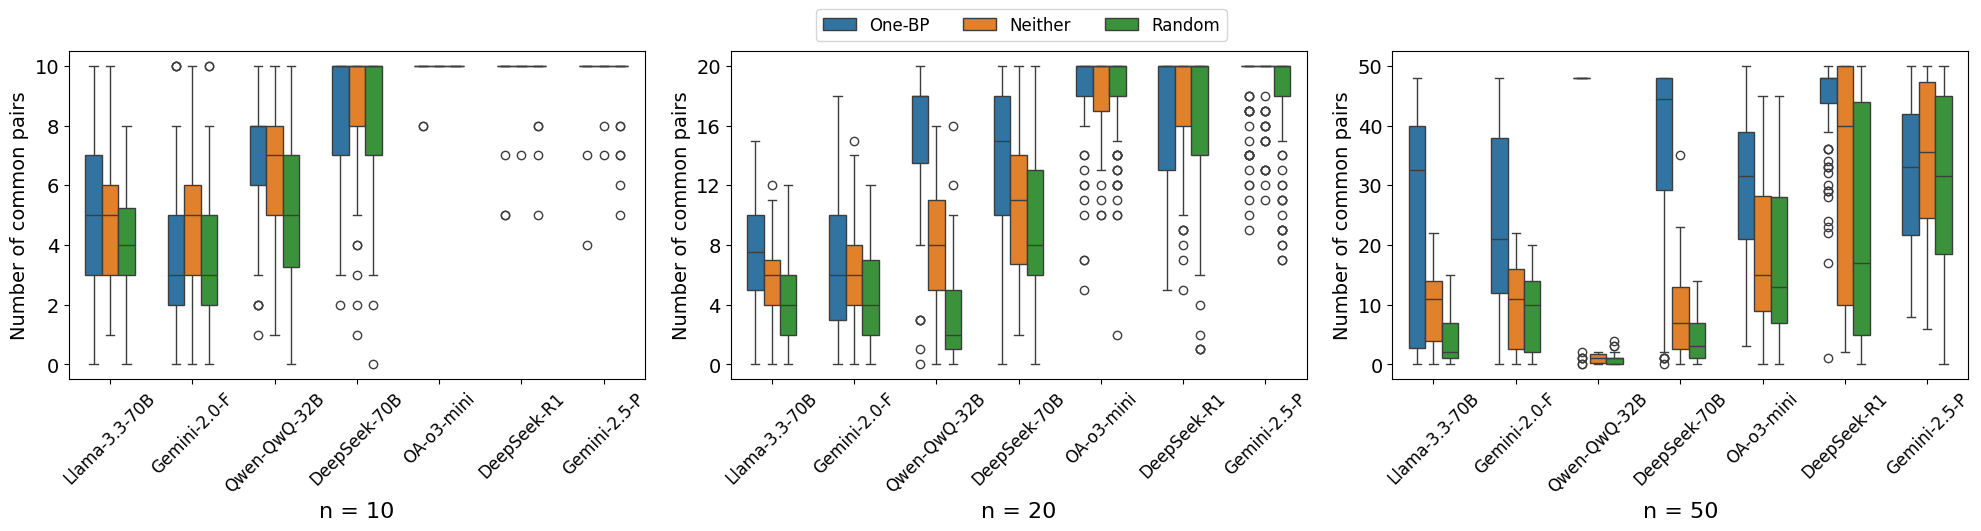

In [8]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
yticks = {
    10: [i*2 for i in range(6)],
    20: [i*4 for i in range(6)],
    50: [i*10 for i in range(6)]
}
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    df = pd.read_csv(results_dir+f'intersection_combined_{size}.csv')
    maxval = max(df['Intersection'].values)
    models = df['Model'].unique()
    print(df['Type'].unique())
    ax = sns.boxplot(y="Intersection", x="Model", hue="Type", data=df, orient='v', width=0.6, ax=axes[p])
    ax.set_ylabel("Number of common pairs", fontsize=14)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size], fontsize = 14)
    ax.set_xlabel(f"n = {size}", fontsize=16)
    ax.set_xticklabels(models, rotation=45, fontsize=12)
    p += 1
    ax.legend([], [], frameon=False)
    handles, labels = ax.get_legend_handles_labels()
        

fig.legend(handles, labels, bbox_to_anchor=(0.62,1.07), fontsize=12, ncol = 5)

fig.tight_layout()
fig.savefig(results_dir+"intersection_pt2b.pdf", bbox_inches="tight")

In [62]:
# Welch’s t-test
from scipy import stats
import itertools

bp_dfs = {}

file_names = {
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

combined = pd.concat([gemini, llama, qwen, gemini25, o3mini, dsd, deepseek])



for size in [10, 20, 50]:
    models = []
    types = []
    intersections = []
    for model in file_names:
        subset = pd.read_csv(results_dir+file_names[model])
        one_inter = subset[(subset['Size'] == size) & (subset['Type'] == 'random_1') & (subset['Remarks'] == 'Processed smoothly.')]['Blocking_Pair_Count'].values
        models.extend([model]*len(one_inter))   
        types.extend(['One-BP']*len(one_inter))
        intersections.extend(one_inter)
        subseto = pd.read_csv('../evaluating_responses/part_1/'+file_names[model])
        none = subseto[(subseto['Size'] == size)& (subseto['Remarks'] == 'Processed smoothly.')]['Blocking_Pair_Count'].values
        # if model == 'DeepSeek-R1':
        #     print(none)
        models.extend([model]*len(none))   
        types.extend(['Neither']*len(none))
        intersections.extend(none)
        ran_inter = subset[(subset['Size'] == size) & (subset['Type'] == 'random')& (subset['Remarks'] == 'Processed smoothly.')]['Blocking_Pair_Count'].values
        models.extend([model]*len(ran_inter))   
        types.extend(['Random']*len(ran_inter))
        intersections.extend(ran_inter)
    df = pd.DataFrame(zip(models, types, intersections), columns=['Model', 'Type', 'BP_count'])
    df.to_csv(results_dir+f'bps_combined_{size}.csv', index=False)         
    

['One-BP' 'Neither' 'Random']
['One-BP' 'Neither' 'Random']
['One-BP' 'Neither' 'Random']


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

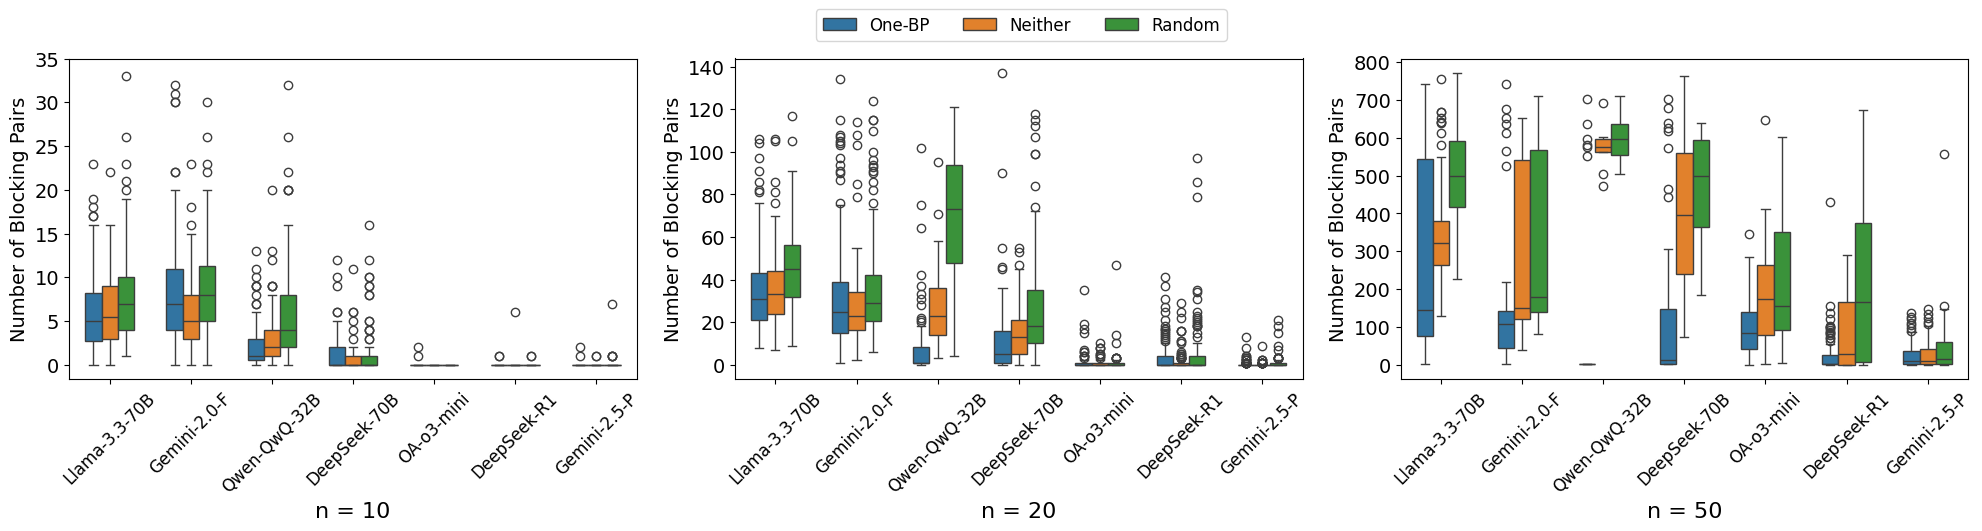

In [68]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
yticks = {
    10: [i*5 for i in range(8)],
    20: [i*20 for i in range(8)],
    50: [i*100 for i in range(9)]
}
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    df = pd.read_csv(results_dir+f'bps_combined_{size}.csv')
    maxval = max(df['BP_count'].values)
    models = df['Model'].unique()
    print(df['Type'].unique())
    ax = sns.boxplot(y="BP_count", x="Model", hue="Type", data=df, orient='v', width=0.6, ax=axes[p])
    ax.set_ylabel("Number of Blocking Pairs", fontsize=14)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size], fontsize = 14)
    ax.set_xlabel(f"n = {size}", fontsize=16)
    ax.set_xticklabels(models, rotation=45, fontsize=12)
    p += 1
    ax.legend([], [], frameon=False)
    handles, labels = ax.get_legend_handles_labels()
        

fig.legend(handles, labels, bbox_to_anchor=(0.62,1.07), fontsize=12, ncol = 5)

fig.tight_layout()
fig.savefig(results_dir+"bp_counts_pt2b.pdf", bbox_inches="tight")

In [13]:
import csv
from BlockingPairs import blockingPairs
import json

combined = [['Model', 'Culture', 'Size', 'Type', 'Instability', 'Optimality']]
file_names = {
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

def JSONMatchToList(json_match_string):
    json_match_string = json_match_string.replace(" ", "")
    if json_match_string.endswith("],]"):
        pairs = json_match_string[1:-2].split('],[')
    else:
        pairs = json_match_string[1:-1].split('],[')
    
    # print("IN JSON TO STR FUNC")
    # print(pairs)

    # Step 2: Extract the W number from each pair and convert to integer
    result = []
    for pair in pairs:
        # Split the pair and take the second element (Wj), then extract the number
        w_value_str = (pair.split(',')[1][1:])
        if w_value_str[-1] == "]":
            if w_value_str[-2] == "]":
                w_value = int(w_value_str[:-2])
            else:
                w_value = int(w_value_str[:-1])
        else:
            w_value = int(w_value_str)
        result.append(w_value)

    # Step 3: Print the resulting list
    return result
    # print(result)  # Output: [7, 2, 9, 5, 4, 1, 6, 8, 10, 3]

def JSONobjToList(json_obj, n):
    if not json_obj:
        print("EMPTY JSON OBJ")
        return [], 'empty'
    matching = []
    for m in range(1, n+1):
        mstring = f"M{m}"
        if mstring not in json_obj or not json_obj[mstring] or json_obj[mstring].lower().strip() == 'none':
            matching.append(0)
        else:
            try:
                woman = int(json_obj[mstring][1:])
                matching.append(woman)
            except:
                print(f"WRONG VALUE FORMAT: {json_obj[mstring]}")
                return matching, f"For example, {mstring}'s match is given the incorrect format - {json_obj[mstring]}. "
    return matching, "okay"

def jaccard_similarity(list1, list2):
    set1 = set()
    set2 = set()
    for m, w in enumerate(list1):
        set1.add((m+1, w))
    for m, w in enumerate(list2):
        set2.add((m+1, w))

    jaccard_sim = len(set1.intersection(set2))/len(set1.union(set2))

    return jaccard_sim, len(set1.intersection(set2))


for culture in ['ic', 'womanmaster']:
    for size in [10,20,50]:
        instances_data = pd.read_csv(f'../instances_matchings/{size}_{culture}_processed.csv')
        for row in instances_data.values:
            rand_match = JSONMatchToList(row[12])
            men_opt = JSONMatchToList(row[6])
            bp = blockingPairs(size, row[4], row[5], np.array(rand_match), "weak")
            bplist = bp['blockingPairs']
            male_set, female_set = set(), set()
            for man, woman in bplist:
                female_set.add(woman)
                male_set.add(man)
            instability = round((len(female_set)+len(male_set))*100/(size*2), 2)
            # print(instability)
            # print(blocked, len(male_set), len(female_set), i)
            js, inter = jaccard_similarity(rand_match, men_opt)
            combined.append(['Random', culture, size, '_', instability, round(js, 2)])
        for model in file_names:
            model_data = pd.read_csv(results_dir+file_names[model])
            for typ in ['random_1', 'random']:
                subset = model_data[(model_data['Culture'] == culture) & (model_data['Size'] == size) & (model_data['Type'] == typ)]
                for i, row in enumerate(subset.values):
                    if row[-1] != 'Processed smoothly.': continue
                    answer, verdict = JSONobjToList(json.loads(row[4].replace('\'', '\"')), size)
                    men_opt = JSONMatchToList(instances_data['men_opt'].values[i])
                    js, inter = jaccard_similarity(answer, men_opt)
                    male_set, female_set = set(), set()
                    blocked = row[7].replace('[', '').replace(']', '').split(', ')
                    if row[5] == 1: 
                        combined.append([model, culture, size, typ, 0, 1])
                        continue
                    # print(row[6])
                    for i, agent in enumerate(blocked):
                        if i%2:
                            female_set.add(agent)
                        else:
                            male_set.add(agent)
                    instability = round((len(female_set)+len(male_set))*100/(size*2), 2)
                    # print(instability)
                    # print(blocked, len(male_set), len(female_set), i)
                    combined.append([model, culture, size, typ, instability, round(row[-3], 2)])

                        # print(model, culture, size, row[-2], inter)

with open(results_dir+'combined_instability_intersection.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(combined)




In [4]:
from scipy import stats

combined = pd.read_csv(results_dir+'combined_instability_intersection.csv')

for size in [10,20,50]:
    print(size, '$$$$$$$$$$$$$$$$$$$$$$$$$$')
    for model in file_names:
        series1 = combined[(combined['Model'] == model) & (combined['Type'] == 'random_1') & (combined['Size'] == size)]['Instability'].values
        print(model, typ, round(sum(series1)/len(series1), 2) if series1.any() else 0)
        seriesr = combined[(combined['Model'] == model) & (combined['Type'] == 'random') & (combined['Size'] == size)]['Instability'].values
        print(model, typ, round(sum(seriesr)/len(seriesr), 2) if seriesr.any() else 0)
        test = stats.ttest_ind(series1, seriesr, equal_var=False)
        if test.pvalue < 0.05: 
            print('SIGNIFICANT!', test)
        print()
    rand_list = combined[(combined['Model'] == 'Random') & (combined['Size'] == size)]['Instability'].values
    print('Random', round(sum(rand_list)/len(rand_list), 2) if rand_list.any() else 0)
    print()

10 $$$$$$$$$$$$$$$$$$$$$$$$$$
Gemini-2.0-F random 0.46
Gemini-2.0-F random 0.46

Llama-3.3-70B random 0.34
Llama-3.3-70B random 0.42
SIGNIFICANT! TtestResult(statistic=-3.1520398318500873, pvalue=0.0018759132441014798, df=196.0063950746271)

Qwen-QwQ-32B random 0.16
Qwen-QwQ-32B random 0.33
SIGNIFICANT! TtestResult(statistic=-6.503772012274838, pvalue=8.374662144411293e-10, df=170.2624244506568)

DeepSeek-70B random 0.09
DeepSeek-70B random 0.09

OA-o3-mini random 0.0
OA-o3-mini random 0

DeepSeek-R1 random 0.0
DeepSeek-R1 random 0.0

Gemini-2.5-P random 0.0
Gemini-2.5-P random 0.01

Random 0.77

20 $$$$$$$$$$$$$$$$$$$$$$$$$$
Gemini-2.0-F random 0.54
Gemini-2.0-F random 0.59

Llama-3.3-70B random 0.57
Llama-3.3-70B random 0.64
SIGNIFICANT! TtestResult(statistic=-3.237033254157348, pvalue=0.0014228682033622807, df=191.9237213630869)

Qwen-QwQ-32B random 0.18
Qwen-QwQ-32B random 0.75
SIGNIFICANT! TtestResult(statistic=-17.47437321314211, pvalue=1.356885415104159e-37, df=145.878624570758)

In [5]:
# Welch’s t-test
from scipy import stats
import itertools

bp_dfs = {}

file_names = {
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

combined2b = pd.read_csv('../evaluating_responses/part_2b/combined_instability_intersection.csv')
combined1 = pd.read_csv('../evaluating_responses/part_1/combined_instability_intersection.csv')

for size in [10, 20, 50]:
    models = []
    types = []
    intersections = []
    for model in file_names:
        subset = combined2b[combined2b['Model'] == model]
        one_inter = subset[(subset['Size'] == size) & (subset['Type'] == 'random_1')]['Optimality'].values
        models.extend([model]*len(one_inter))   
        types.extend(['One-BP']*len(one_inter))
        intersections.extend(one_inter)
        subseto = combined1[combined1['Model'] == model]
        none = subseto[(subseto['Size'] == size)]['Optimality'].values
        # if model == 'DeepSeek-R1':
        #     print(none)
        models.extend([model]*len(none))   
        types.extend(['Neither']*len(none))
        intersections.extend(none)
        ran_inter = subset[(subset['Size'] == size) & (subset['Type'] == 'random')]['Optimality'].values
        models.extend([model]*len(ran_inter))   
        types.extend(['Random']*len(ran_inter))
        intersections.extend(ran_inter)
    df = pd.DataFrame(zip(models, types, intersections), columns=['Model', 'Type', 'Optimality'])
    df.to_csv(results_dir+f'opt_combined_{size}.csv', index=False)         
    

           Model    Type  Optimality
0  Llama-3.3-70B  One-BP        0.33
1  Llama-3.3-70B  One-BP        0.18
2  Llama-3.3-70B  One-BP        0.33
3  Llama-3.3-70B  One-BP        0.54
4  Llama-3.3-70B  One-BP        0.43
           Model    Type  Optimality
0  Llama-3.3-70B  One-BP        0.33
1  Llama-3.3-70B  One-BP        0.21
2  Llama-3.3-70B  One-BP        0.05
3  Llama-3.3-70B  One-BP        0.21
4  Llama-3.3-70B  One-BP        0.25
           Model    Type  Optimality
0  Llama-3.3-70B  One-BP        0.03
1  Llama-3.3-70B  One-BP        0.01
2  Llama-3.3-70B  One-BP        0.01
3  Llama-3.3-70B  One-BP        0.04
4  Llama-3.3-70B  One-BP        0.54


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

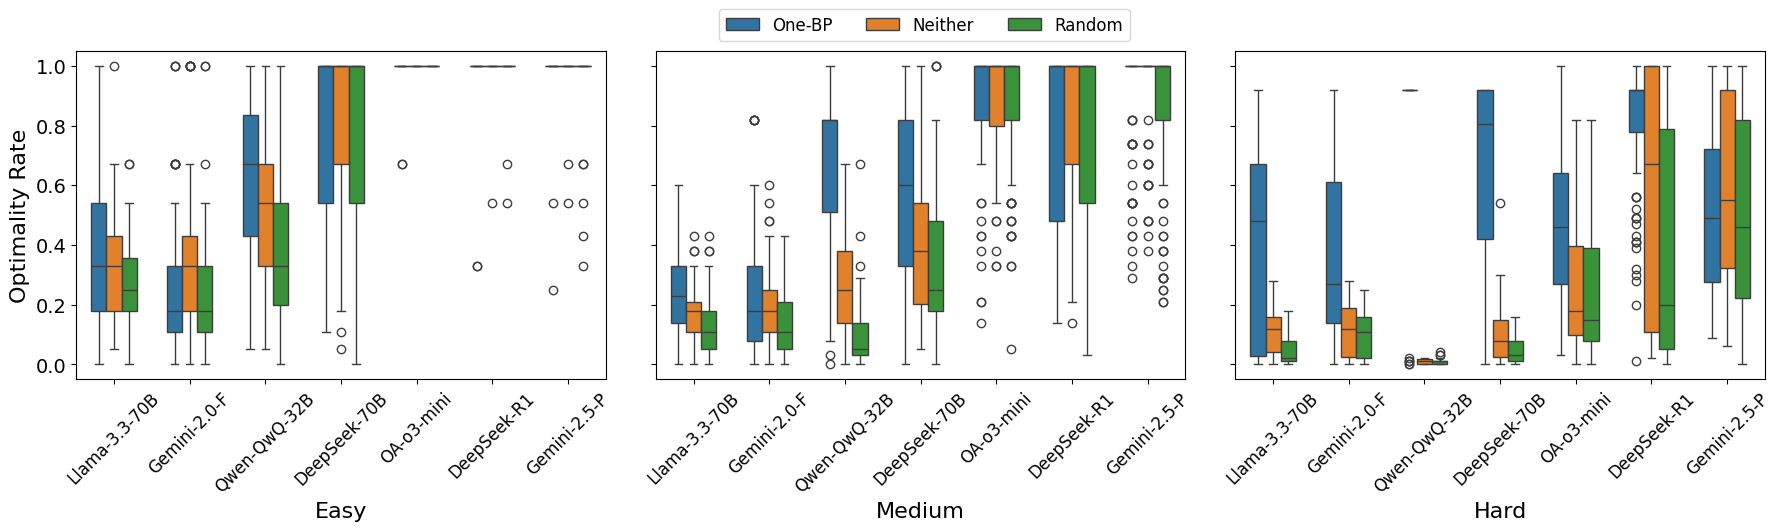

In [6]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
yticks = {
    10: [round(0.2*i,1) for i in range(6)],
    20: [round(0.2*i,1) for i in range(6)],
    50: [round(0.2*i,1) for i in range(6)]
}
names = {
    10: "Easy",
    20: "Medium",
    50: "Hard",
}
palette = sns.color_palette()
order  = list(file_names.keys())
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    total_df = pd. read_csv(results_dir+f'opt_combined_{size}.csv')
    df = total_df[(total_df['Optimality'] < 100)]
    print(df.head())
    maxval = max(df['Optimality'].values)
    models = df['Model'].unique()
    ax = sns.boxplot(y="Optimality", x="Model", data=df, orient='v', hue="Type", width=0.6, ax=axes[p], color='green', order=order, palette='tab10')
    ax.set_ylabel("Optimality Rate" if size < 20 else '', fontsize=16)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size] if size < 20 else ['']*6, fontsize = 14)
    ax.set_xlabel(f"{names[size]}", fontsize=16)
    ax.set_xticklabels(order, rotation=45, fontsize=12)
    p += 1
    ax.legend([], [], frameon=False)
    handles, labels = ax.get_legend_handles_labels()
        

fig.legend(handles, labels, bbox_to_anchor=(0.635,1.07), fontsize=12, ncol = 5)

fig.tight_layout()
fig.savefig(results_dir+"optimality_correction.pdf", bbox_inches="tight")
